# Datasets

### 1. Dataset Gathering

* Netflix Prize data (kaggle.com) [https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data/data]
\
\
* MovieLens | GroupLens [https://grouplens.org/datasets/movielens/]
\
\
* Recommendation and Ratings Public Data Sets For Machine Learning (github.com) [https://gist.github.com/entaroadun/1653794]
\
\
* caserec/Datasets-for-Recommender-Systems: This is a repository of a topic-centric public data sources in high quality for Recommender Systems (RS) (github.com) [https://github.com/caserec/Datasets-for-Recommender-Systems?tab=readme-ov-file]
\
\
* The Movies Dataset (kaggle.com) [https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset]
\
\
* Rotten Tomatoes [https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews] [https://www.kaggle.com/datasets/talha002/rottentomatoes-400k-review]  <b> EXCLUDED NO USERID </b>
\
\
* IMDB [https://www.kaggle.com/datasets/pawankumargunjan/imdb-review/data] [https://developer.imdb.com/non-commercial-datasets/]


### 2. Different Data Exploration

In [1]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from io import StringIO
import chardet

In [2]:
path = "./inDatasets/"
sub_path = os.listdir(path)
sub_path = [os.path.join(path, item) for item in sub_path]

In [3]:
total_list = []

def all_files(path, total_list):
    if not os.path.isdir(path):
        if path.endswith("txt") or path.endswith("csv"):
            total_list.append(path)
        return total_list
    for item in os.listdir(path):
        total_list = all_files(os.path.join(path, item), total_list)   
    return total_list

In [4]:
total_list = all_files(path, total_list)

In [5]:
total_list

['./inDatasets/kaggleDataset\\credits.csv',
 './inDatasets/kaggleDataset\\keywords.csv',
 './inDatasets/kaggleDataset\\links.csv',
 './inDatasets/kaggleDataset\\links_small.csv',
 './inDatasets/kaggleDataset\\movies_metadata.csv',
 './inDatasets/kaggleDataset\\ratings.csv',
 './inDatasets/kaggleDataset\\ratings_small.csv']

In [9]:
def is_numeric(series):
    try:
        pd.to_numeric(series, errors='raise')
        return True
    except (TypeError, ValueError):
        return False

for item in total_list:
    try:
        print(item)
        file = pd.read_csv(item)
        num=1
        for col in file.columns:
            print(f"{num}. Column {col}:")
            num+=1
            print(f"dtype = {file[col].dtype}")
            print(f"num of unique values = {len(file[col].unique())}, num of Nulls = {len(file[file[col].isnull()])}")
        print()
    except:
        continue

./inDatasets/kaggleDataset\credits.csv
1. Column cast:
dtype = object
num of unique values = 43019, num of Nulls = 0
2. Column crew:
dtype = object
num of unique values = 44669, num of Nulls = 0
3. Column id:
dtype = int64
num of unique values = 45432, num of Nulls = 0

./inDatasets/kaggleDataset\keywords.csv
1. Column id:
dtype = int64
num of unique values = 45432, num of Nulls = 0
2. Column keywords:
dtype = object
num of unique values = 25989, num of Nulls = 0

./inDatasets/kaggleDataset\links.csv
1. Column movieId:
dtype = int64
num of unique values = 45843, num of Nulls = 0
2. Column imdbId:
dtype = int64
num of unique values = 45843, num of Nulls = 0
3. Column tmdbId:
dtype = float64
num of unique values = 45595, num of Nulls = 219

./inDatasets/kaggleDataset\links_small.csv
1. Column movieId:
dtype = int64
num of unique values = 9125, num of Nulls = 0
2. Column imdbId:
dtype = int64
num of unique values = 9125, num of Nulls = 0
3. Column tmdbId:
dtype = float64
num of unique val

C:\Users\Hussein\AppData\Local\Temp\ipykernel_21084\1490853871.py:11: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(item)


1. Column adult:
dtype = object
num of unique values = 5, num of Nulls = 0
2. Column belongs_to_collection:
dtype = object
num of unique values = 1699, num of Nulls = 40972
3. Column budget:
dtype = object
num of unique values = 1226, num of Nulls = 0
4. Column genres:
dtype = object
num of unique values = 4069, num of Nulls = 0
5. Column homepage:
dtype = object
num of unique values = 7674, num of Nulls = 37684
6. Column id:
dtype = object
num of unique values = 45436, num of Nulls = 0
7. Column imdb_id:
dtype = object
num of unique values = 45418, num of Nulls = 17
8. Column original_language:
dtype = object
num of unique values = 93, num of Nulls = 11
9. Column original_title:
dtype = object
num of unique values = 43373, num of Nulls = 0
10. Column overview:
dtype = object
num of unique values = 44308, num of Nulls = 954
11. Column popularity:
dtype = object
num of unique values = 44177, num of Nulls = 5
12. Column poster_path:
dtype = object
num of unique values = 45025, num of Nul

# 3. kaggle Dataset EDA & Cleaning

Based on this exploration, 3 files seem to be relevent for a model to start  with:
1. ratings.csv \[index 5]
2. keywords.csv \[index 1]
3. movies_metadata.csv \[index 4]

In the following part more thorough cleaning and preprocessing..

## 3.1. Exploring ratings.csv

In [10]:
review = pd.read_csv(total_list[5])
review.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


1. Reviews distribution per movies
2. Reviews distribution per users

<b>Reviews per Movies</b>

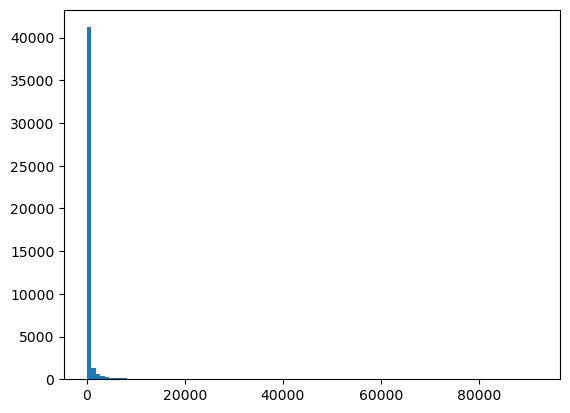

In [14]:
review_count = review.groupby(["movieId"])["userId"].count()
plt.hist(review_count, bins=100)
plt.show()

In [20]:
print(f"Mean = {review_count.mean()}\nMode = {review_count.mode()[0]}\nThe quantiles are as follow:")
percentiles = review_count.quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])
print(percentiles)

Mean = 576.8433780339134
Mode = 1
The quantiles are as follow:
0.00        1.0
0.10        1.0
0.25        2.0
0.50        8.0
0.75       69.0
0.90      695.0
1.00    91921.0
Name: userId, dtype: float64


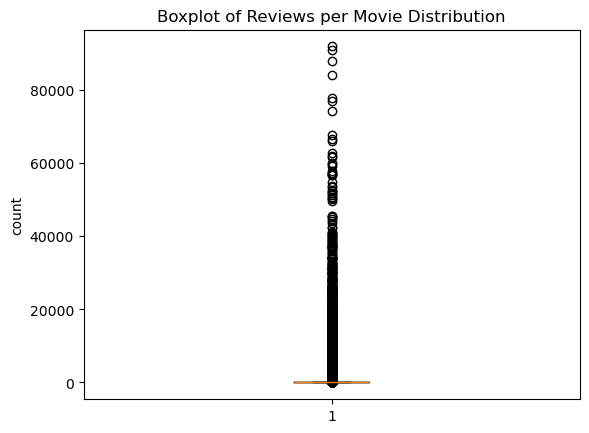

In [22]:
plt.boxplot(review_count)
plt.title('Boxplot of Reviews per Movie Distribution')
plt.ylabel('count')
plt.show()

<b>Reviews per User</b>

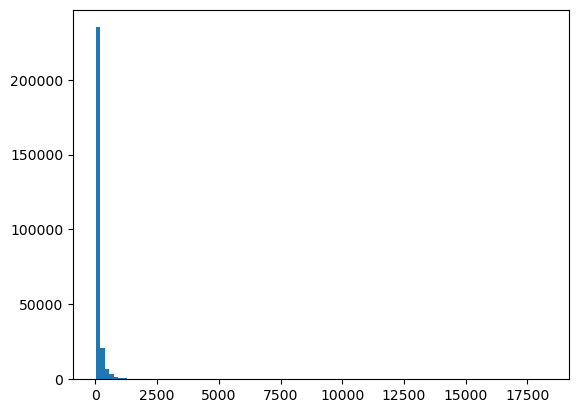

In [23]:
review_count = review.groupby(["userId"])["movieId"].count()
plt.hist(review_count, bins=100)
plt.show()

In [24]:
print(f"Mean = {review_count.mean()}\nMode = {review_count.mode()[0]}\nThe quantiles are as follow:")
percentiles = review_count.quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])
print(percentiles)

Mean = 96.06745393065974
Mode = 15
The quantiles are as follow:
0.00        1.0
0.10        6.0
0.25       15.0
0.50       30.0
0.75       93.0
0.90      236.0
1.00    18276.0
Name: movieId, dtype: float64


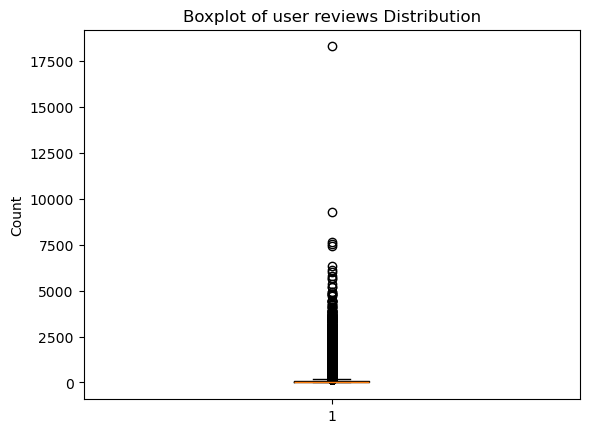

In [27]:
plt.boxplot(review_count)
plt.title('Boxplot of user reviews Distribution')
plt.ylabel('Count')
plt.show()

In [31]:
review.to_csv("./outDatasets/ratings.csv", index=False)

## 3.2. Exploring keywords.csv

In [46]:
keywords = pd.read_csv(total_list[1])
print(keywords.columns)

Index(['id', 'keywords'], dtype='object')


In [47]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [48]:
import json
import ast

keywords["keywords"] = keywords["keywords"].apply(ast.literal_eval)
keywords = keywords.explode("keywords")

In [49]:
empty = len(keywords[keywords["keywords"].isnull()])
print(f"percentage of movies with no keywords: {empty / len(keywords) *100}%")

percentage of movies with no keywords: 8.528606427439112%


In [52]:
def json_replacement(x, key):
    if isinstance(x, dict):
        return x.get(key, 0)
    return None

def to_int(x):
    try:
        x = int(x)
        return x
    except:
        return x

keywords["keyID"] = keywords["keywords"].apply(lambda x: json_replacement(x, "id"))
keywords["key"] = keywords["keywords"].apply(lambda x: json_replacement(x, "name"))
#keywords = keywords[["id", "keyID", "key"]]
keywords.head()

,id,keywords,keyID,key
0,862,"{'id': 931, 'name': 'jealousy'}",931.0,jealousy
0,862,"{'id': 4290, 'name': 'toy'}",4290.0,toy
0,862,"{'id': 5202, 'name': 'boy'}",5202.0,boy
0,862,"{'id': 6054, 'name': 'friendship'}",6054.0,friendship
0,862,"{'id': 9713, 'name': 'friends'}",9713.0,friends


In [61]:
keywords[keywords["keyID"].isna()].head()

,id,keywords,keyID,key
7,45325,NaN,NaN,None
32,78802,NaN,NaN,None
36,139405,NaN,NaN,None
50,117164,NaN,NaN,None
55,124057,NaN,NaN,None


In [62]:
len(keywords[keywords["keyID"].isna()])

14795

In [63]:
keywords_NoNa = keywords.dropna()

In [68]:
keywords_NoNa[keywords_NoNa["keyID"].isna()]

,id,keywords,keyID,key


In [71]:
keywords = keywords_NoNa[["id", "keyID", "key"]]

In [74]:
keywords["keyID"] = keywords["keyID"].astype(int)

C:\Users\Hussein\AppData\Local\Temp\ipykernel_21084\552157581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keywords["keyID"] = keywords["keyID"].astype(int)


In [75]:
keywords.head()

,id,keyID,key
0,862,931,jealousy
0,862,4290,toy
0,862,5202,boy
0,862,6054,friendship
0,862,9713,friends


In [76]:
keywords.to_csv("./outDatasets/keywords.csv", index=False)

<b>Grouping Movies with Keywords</b>

In [77]:
keyward_grouped = keywords.groupby("key")["id"].count()

In [78]:
print(f"Mean of keywords per Movie: {keyward_grouped.mean()}")
print(f"Mode of keywords per Movie: {keyward_grouped.mode()[0]}")
percentile = keyward_grouped.quantile([0, 0.1, .25, .5, .75, .9, 1])
print(percentile)

Mean of keywords per Movie: 7.9514932852275
Mode of keywords per Movie: 1
0.00       1.0
0.10       1.0
0.25       1.0
0.50       2.0
0.75       5.0
0.90      15.0
1.00    3115.0
Name: id, dtype: float64


In [79]:
sum(keyward_grouped > 100)

214

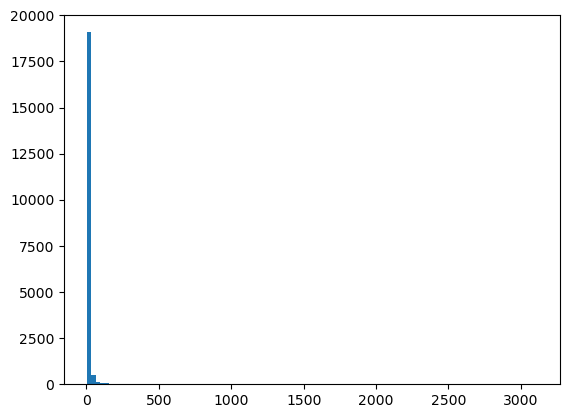

In [80]:
plt.hist(keyward_grouped, bins=100)
plt.show()

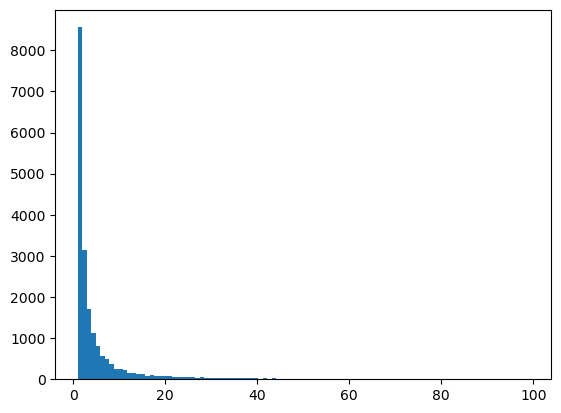

In [81]:
plt.hist(keyward_grouped[keyward_grouped < 100], bins=100)
plt.show()

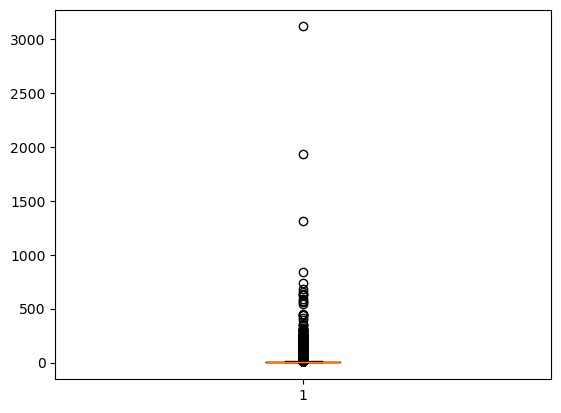

In [82]:
plt.boxplot(keyward_grouped)
plt.show()

## 3.3. Movies Metadata EDA

In [161]:
total_list[4]

'./inDatasets/kaggleDataset\\movies_metadata.csv'

In [162]:
meta_data = pd.read_csv(total_list[4])

C:\Users\Hussein\AppData\Local\Temp\ipykernel_21084\1336996529.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv(total_list[4])


In [163]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [164]:
for col in meta_data.columns:
    print(f"Column {col}:")
    print(f"number of unique numbers in this column = {len(meta_data[col].unique())}")
    print(f"number of Null Values in this column = {len(meta_data[col].isna())}")
    print(meta_data[col].dtype)
    if len(meta_data[col].unique()) < 10:
        print(f" Values: \n{meta_data[col].unique()}")
    print()

Column adult:
number of unique numbers in this column = 5
number of Null Values in this column = 45466
object
 Values: 
['False' 'True' ' - Written by Ørnås'
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']

Column belongs_to_collection:
number of unique numbers in this column = 1699
number of Null Values in this column = 45466
object

Column budget:
number of unique numbers in this column = 1226
number of Null Values in this column = 45466
object

Column genres:
number of unique numbers in this column = 4069
number of Null Values in this column = 45466
object

Column homepage:
number of unique numbers in this column = 7674
number of Null Values in this column = 45466
object

Column id:
number of unique numbers in this column = 45436
number of Null Values in this column = 45466
object

Column 

In [165]:
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [166]:
meta_data.iloc[0]

adult                                                                False
belongs_to_collection    {'id': 10194, 'name': 'Toy Story Collection', ...
budget                                                            30000000
genres                   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
homepage                              http://toystory.disney.com/toy-story
id                                                                     862
imdb_id                                                          tt0114709
original_language                                                       en
original_title                                                   Toy Story
overview                 Led by Woody, Andy's toys live happily in his ...
popularity                                                       21.946943
poster_path                               /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
production_companies        [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries     

In [167]:
cleaned_metadata = meta_data
cleaned_metadata = cleaned_metadata.drop(columns=["belongs_to_collection", 
                                                  "homepage", 
                                                  "poster_path", 
                                                  "status", 
                                                  "tagline", 
                                                  "video"])

In [168]:
cleaned_metadata.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [169]:
cleaned_metadata["genres"] = cleaned_metadata["genres"].apply(ast.literal_eval)
cleaned_metadata = cleaned_metadata.explode("genres")

In [170]:
cleaned_metadata.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,"{'id': 16, 'name': 'Animation'}",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
0,False,30000000,"{'id': 35, 'name': 'Comedy'}",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
0,False,30000000,"{'id': 10751, 'name': 'Family'}",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"{'id': 12, 'name': 'Adventure'}",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
1,False,65000000,"{'id': 14, 'name': 'Fantasy'}",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0


In [171]:
def json_replacement(x, key):
    if isinstance(x, dict):
        return x.get(key, 0)
    return None

cleaned_metadata["genreID"] = cleaned_metadata["genres"].apply(lambda x: json_replacement(x, "id"))
cleaned_metadata["genreName"] = cleaned_metadata["genres"].apply(lambda x: json_replacement(x, "name"))
cleaned_metadata = cleaned_metadata.drop(columns=["genres"])

In [172]:
cleaned_metadata.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,genreID,genreName
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,16.0,Animation
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,35.0,Comedy
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,10751.0,Family
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,12.0,Adventure
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,14.0,Fantasy


### Applying the Same parsing Algorithm on production_companies

In [173]:
cleaned_metadata["production_companies"].iloc[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [174]:
cleaned_metadata["production_companies"] = cleaned_metadata["production_companies"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
cleaned_metadata = cleaned_metadata.explode("production_companies")

cleaned_metadata["production_companies_ID"] = cleaned_metadata["production_companies"].apply(lambda x: json_replacement(x, "id"))
cleaned_metadata["production_companies_Name"] = cleaned_metadata["production_companies"].apply(lambda x: json_replacement(x, "name"))
cleaned_metadata = cleaned_metadata.drop(columns=["production_companies"]) 

In [175]:
cleaned_metadata.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,genreID,genreName,production_companies_ID,production_companies_Name
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,16.0,Animation,3.0,Pixar Animation Studios
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,35.0,Comedy,3.0,Pixar Animation Studios
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,10751.0,Family,3.0,Pixar Animation Studios
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,12.0,Adventure,559.0,TriStar Pictures
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,12.0,Adventure,2550.0,Teitler Film


In [176]:
cleaned_metadata["production_countries"].iloc[10000]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [177]:
cleaned_metadata["spoken_languages"].iloc[10000]

"[{'iso_639_1': 'en', 'name': 'English'}]"

### Applying the Same parsing Algorithm on production_countries & spoken_languages

In [178]:
for col in ["production_countries", "spoken_languages"]:
    cleaned_metadata[col] = cleaned_metadata[col].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
    cleaned_metadata = cleaned_metadata.explode(col)
    for key in cleaned_metadata[col].iloc[0].keys():
        cleaned_metadata[col + key] = cleaned_metadata[col].apply(lambda x: json_replacement(x, key))
    cleaned_metadata = cleaned_metadata.drop(columns=[col]) 

In [179]:
cleaned_metadata.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,vote_average,vote_count,genreID,genreName,production_companies_ID,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,16.0,Animation,3.0,Pixar Animation Studios,US,United States of America,en,English
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,35.0,Comedy,3.0,Pixar Animation Studios,US,United States of America,en,English
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,10751.0,Family,3.0,Pixar Animation Studios,US,United States of America,en,English
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,6.9,2413.0,12.0,Adventure,559.0,TriStar Pictures,US,United States of America,en,English
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,6.9,2413.0,12.0,Adventure,559.0,TriStar Pictures,US,United States of America,fr,Français


In [180]:
cleaned_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'production_countriesiso_3166_1', 'production_countriesname',
       'spoken_languagesiso_639_1', 'spoken_languagesname'],
      dtype='object')

In [181]:
cleaned_metadata["adult"].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [182]:
cleaned_metadata = cleaned_metadata[(cleaned_metadata["adult"] == "False") | (cleaned_metadata["adult"] == "True")]

In [183]:
cleaned_metadata["adult"].unique()

array(['False', 'True'], dtype=object)

In [184]:
def assert_datatype_homoginity(x):
    data_types = set()
    examples = {}
    for item in x:
        len_before = len(data_types)
        data_types.add(type(item))
        if len(data_types) - len_before > 0:
            examples[str(type(item))] = item

    return data_types, examples

for col in cleaned_metadata.columns:
    print(f"Column {col}:")
    data_types, examples = assert_datatype_homoginity(cleaned_metadata[col])
    print(f"data types = {data_types}")
    print(f"Samples for every type = \n{examples}")
    print()

Column adult:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'False'}

Column budget:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": '30000000'}

Column id:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": '862'}

Column imdb_id:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": 'tt0114709', "<class 'float'>": nan}

Column original_language:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": 'en', "<class 'float'>": nan}

Column original_title:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'Toy Story'}

Column overview:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstanc

### Dropping Missing Values for title & id

In [194]:
cleaned_metadata["id"] = cleaned_metadata["id"].astype(int)
cleaned_metadata["popularity"] = cleaned_metadata["popularity"].astype(float)
cleaned_metadata["budget"] = cleaned_metadata["budget"].astype(int)

In [195]:
cleaned_metadata[cleaned_metadata["id"].isna()]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,vote_average,vote_count,genreID,genreName,production_companies_ID,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname


In [196]:
cleaned_metadata[cleaned_metadata["title"] != cleaned_metadata["original_title"]][["title", "original_title"]]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
28,The City of Lost Children,La Cité des Enfants Perdus
28,The City of Lost Children,La Cité des Enfants Perdus
28,The City of Lost Children,La Cité des Enfants Perdus
28,The City of Lost Children,La Cité des Enfants Perdus
...,...,...
45455,St. Michael Had a Rooster,San Michele aveva un gallo
45461,Subdue,رگ خواب
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal


In [207]:
info = cleaned_metadata[(cleaned_metadata["original_language"].isna())]

In [209]:
info = info[info["title"] != info["original_title"]]

In [210]:
info

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,vote_average,vote_count,genreID,genreName,production_companies_ID,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname
37407,False,0,257095,tt0225145,NaN,Bajaja,The first fairy tale transformed into a full-l...,0.036841,1950-01-26,0.0,...,5.0,1.0,16.0,Animation,2502.0,Ceskoslovenský Státní Film,CZ,Czech Republic,cs,Český
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,16.0,Animation,NaN,None,None,None,sv,svenska
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,16.0,Animation,NaN,None,None,None,en,English
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,16.0,Animation,NaN,None,None,None,is,Íslenska
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,99.0,Documentary,NaN,None,None,None,sv,svenska
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,99.0,Documentary,NaN,None,None,None,en,English
44410,False,0,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,2016-03-12,0.0,...,0.0,0.0,99.0,Documentary,NaN,None,None,None,is,Íslenska
44655,False,0,104473,tt0223958,NaN,La prise de Tournavos,"Three military men, seen inside a fortificatio...",0.471325,1897-01-01,0.0,...,4.6,5.0,28.0,Action,7159.0,Star-Film,FR,France,xx,No Language
44655,False,0,104473,tt0223958,NaN,La prise de Tournavos,"Three military men, seen inside a fortificatio...",0.471325,1897-01-01,0.0,...,4.6,5.0,10752.0,War,7159.0,Star-Film,FR,France,xx,No Language
44655,False,0,104473,tt0223958,NaN,La prise de Tournavos,"Three military men, seen inside a fortificatio...",0.471325,1897-01-01,0.0,...,4.6,5.0,18.0,Drama,7159.0,Star-Film,FR,France,xx,No Language


In [213]:
cleaned_metadata = cleaned_metadata[(cleaned_metadata["original_language"].notna())]

### Checking column types

In [214]:
for col in cleaned_metadata.columns:
    print(f"Column {col}:")
    data_types, examples = assert_datatype_homoginity(cleaned_metadata[col])
    print(f"data types = {data_types}")
    print(f"Samples for every type = \n{examples}")
    print()

Column adult:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'False'}

Column budget:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 30000000}

Column id:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 862}

Column imdb_id:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": 'tt0114709', "<class 'float'>": nan}

Column original_language:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'en'}

Column original_title:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'Toy Story'}

Column overview:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, 

In [222]:
cleaned_metadata = cleaned_metadata[cleaned_metadata["title"].notna()]

In [226]:
len(cleaned_metadata[cleaned_metadata["release_date"].isna()])

170

In [227]:
len(cleaned_metadata[cleaned_metadata["imdb_id"].isna()])

65

In [228]:
len(cleaned_metadata)

419662

In [229]:
cleaned_metadata = cleaned_metadata[cleaned_metadata["imdb_id"].notna()]

In [230]:
cleaned_metadata = cleaned_metadata[cleaned_metadata["release_date"].notna()]

In [231]:
len(cleaned_metadata)

419431

### Inspect Column Conditions

In [232]:
for col in cleaned_metadata.columns:
    print(f"Column {col}:")
    data_types, examples = assert_datatype_homoginity(cleaned_metadata[col])
    print(f"data types = {data_types}")
    print(f"Samples for every type = \n{examples}")
    print()

Column adult:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'False'}

Column budget:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 30000000}

Column id:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 862}

Column imdb_id:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'tt0114709'}

Column original_language:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'en'}

Column original_title:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'Toy Story'}

Column overview:
data types = {<class 'str'>, <class 'float'>}
Samples for every type = 
{"<class 'str'>": "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside th

In [235]:
len(cleaned_metadata.groupby("id")["id"].count())

45321

In [236]:
len(meta_data["id"])

45466

In [237]:
total_list

['./inDatasets/kaggleDataset\\credits.csv',
 './inDatasets/kaggleDataset\\keywords.csv',
 './inDatasets/kaggleDataset\\links.csv',
 './inDatasets/kaggleDataset\\links_small.csv',
 './inDatasets/kaggleDataset\\movies_metadata.csv',
 './inDatasets/kaggleDataset\\ratings.csv',
 './inDatasets/kaggleDataset\\ratings_small.csv']

In [238]:
cleaned_metadata.to_csv("./outDatasets/movies_metadata.csv", index=False)

# 4. Reviews Final Check

In [243]:
for col in review.columns:
    print(f"Column {col}:")
    data_types, examples = assert_datatype_homoginity(review[col])
    print(f"data types = {data_types}")
    print(f"Samples for every type = \n{examples}")
    print()

Column userId:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 1}

Column movieId:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 110}

Column rating:
data types = {<class 'float'>}
Samples for every type = 
{"<class 'float'>": 1.0}

Column timestamp:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 1425941529}



# 5. Keywords Final Check

In [244]:
for col in keywords.columns:
    print(f"Column {col}:")
    data_types, examples = assert_datatype_homoginity(keywords[col])
    print(f"data types = {data_types}")
    print(f"Samples for every type = \n{examples}")
    print()

Column id:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 862}

Column keyID:
data types = {<class 'int'>}
Samples for every type = 
{"<class 'int'>": 931}

Column key:
data types = {<class 'str'>}
Samples for every type = 
{"<class 'str'>": 'jealousy'}



# <h1 align="center">ALL DATA PREPROCESING IS COMPLETE</h1>